In [142]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
elementTranslationMatrix = [[0 for x in range(4)] for x in range(3)]

elementTranslationMatrix[0][0] = 2
elementTranslationMatrix[0][1] = 3
elementTranslationMatrix[0][2] = 1
elementTranslationMatrix[0][3] = 0
elementTranslationMatrix[1][0] = 5
elementTranslationMatrix[1][1] = 6
elementTranslationMatrix[1][2] = 3
elementTranslationMatrix[1][3] = 2
elementTranslationMatrix[2][0] = 6
elementTranslationMatrix[2][1] = 7
elementTranslationMatrix[2][2] = 4
elementTranslationMatrix[2][3] = 3


In [195]:
indexToElementMatrix = [[0 for x in range(8)] for x in range(2)]


indexToElementMatrix[0][0]= -1;
indexToElementMatrix[1][0]= 1;

indexToElementMatrix[0][1]= 0;
indexToElementMatrix[0][1]= 1;

indexToElementMatrix[0][2]= -1;
indexToElementMatrix[1][2]= 0;

indexToElementMatrix[0][3]= 0;
indexToElementMatrix[1][3]= 0;

indexToElementMatrix[0][4]= 1;
indexToElementMatrix[1][4]= 0;

indexToElementMatrix[0][5]= -1;
indexToElementMatrix[1][5]= -1;

indexToElementMatrix[0][6]= 0;
indexToElementMatrix[1][6]= -1;

indexToElementMatrix[0][7]= 1;
indexToElementMatrix[1][7]= -1;



In [110]:
def printMatrix(A) :
    for x in A:
        print(x)

In [252]:


def  gFunction(x,y): #start and end of the edge
    angle = np.arctan(y/x)
    vecLenSquared = x*x + y*y
    return (vecLenSquared**(1/3)) * (np.sin(angle + np.pi/2) ** (2/3))

In [253]:
def getExactFunction(element,localFunction):
    elementsLocation = [[-1,0],[-1,-1],[0,-1]]
    
    if localFunction == 0:
        def exactF(x,y):
            return (1 - (x - elementsLocation[element][0]) ) * (1 - (y - elementsLocation[element][1]))
        return exactF
    if localFunction == 1:
        def exactF(x,y):
            return (x - elementsLocation[element][0] ) * (1 - (y - elementsLocation[element][1]))
        return exactF
    if localFunction == 2:
        def exactF(x,y):
            return (x - elementsLocation[element][0] ) * (y - elementsLocation[element][1])
        return exactF
    if localFunction == 3:
        def exactF(x,y):
            return (1 - (x - elementsLocation[element][0]) ) * (y - elementsLocation[element][1])
        return exactF
    

In [254]:
def getFunctionDerivative(localFunction, ithVariable):
    if localFunction == 2 or ( localFunction == 1 
        and ithVariable == 0) or (localFunction == 3 and ithVariable == 1):
        return 1/2
    else:
        return -1/2

In [255]:
def gauss(weightsMatrix, valuesVector):
    
    matrix = [[0 for x in range(len(weightsMatrix) +1) ] for x in range(len(weightsMatrix))]
    
    for i in range (len(matrix)):
        for j in range(len(matrix)):
            matrix[i][j] = weightsMatrix[i][j]
        matrix[i][len(matrix)] = valuesVector[i]
            
    
    n = len(matrix)

    for i in range(n):

        
        maxElement = abs(matrix[i][i])
        maxRow = i
        
        for k in range(i+1, n):
            if matrix[k][i] > maxElement:
                maxElement = abs(matrix[k][i])
                maxRow = k

        if maxRow != i:
            for k in range(i, n+1):
                tmp = matrix[maxRow][k]
                matrix[maxRow][k] = matrix[i][k]
                matrix[i][k] = tmp

        for k in range(i+1, n):
            matrixMultiplier = -matrix[k][i]/matrix[i][i]
            for j in range(i, n+1):
                if i == j:
                    matrix[k][j] = 0
                else:
                    matrix[k][j] += matrixMultiplier * matrix[i][j]
                    

    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        x[i] = matrix[i][n]/matrix[i][i]
        for k in range(i-1, -1, -1):
            matrix[k][n] -= matrix[k][i] * x[i]
    return x



[0.5, 0.0, 0.0, -0.5, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0.0, -0.5, 1.0, 0.0, 0, 0.0, -0.5, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0.0, -0.5, 0, 0.5, 0.0, 0]
[0, 0, -0.5, 0.0, -0.5, 0.0, 1.0, 0.0]
[0, 0, 0, -0.5, 0.0, 0, 0.0, 0.5]
0.8149802624737184
0
1.0
0
0
0.8149802624737184
0.6299605249474367
0.8149802624737184
[1.6299605249474367, 0.0, 1.7533070166316245, 0.0, 0.0, 1.6299605249474367, 1.506614033263249, 1.6299605249474367]
[1.6299605249474367, 1.506614033263249, 1.6299605249474367]
[1.7533070166316245, 0.0, 0.0]
[1.6299605249474367, 0, 0]


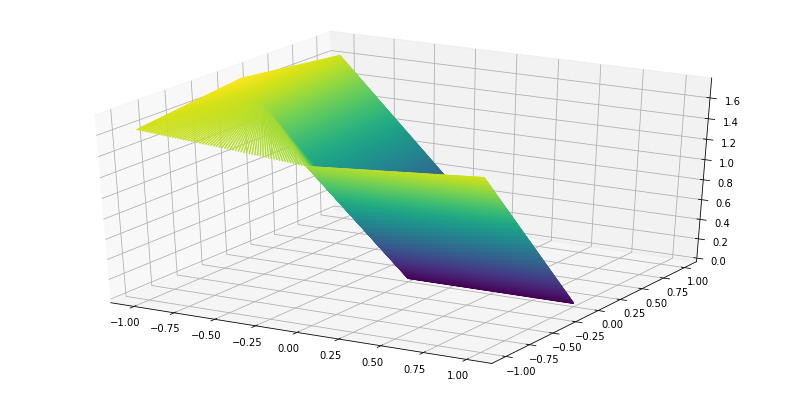

In [256]:
# Diffferential Equations Project
 
bMatrix = [[0 for x in range (8)] for x in range(8)]
lVector = [0 for x in range (8)]


for element in range(3):
    for ithLocalFunction in range(4):
        row = elementTranslationMatrix[element][ithLocalFunction]
        
        if (element == 0):
            lVector[row] += ( getExactFunction(element, ithLocalFunction)(-0.5, 1) *  gFunction(-0.5, 1)
            +getExactFunction(element, ithLocalFunction)(-1,0.5) *  gFunction(-1, 0.5) )
        elif (element == 1):
            lVector[row] +=  ( getExactFunction(element, ithLocalFunction)(-0.5, -1) *  gFunction(-0.5, -1)
            +getExactFunction(element, ithLocalFunction)(-1,-0.5) *  gFunction(-1, -0.5) )
        elif (element == 2):
            lVector[row] += ( getExactFunction(element, ithLocalFunction)(0.5, -1) *  gFunction(0.5, -1)
            +getExactFunction(element, ithLocalFunction)(1,-0.5) *  gFunction(1, -0.5) )
        
        for jthLocalFunction in range(4):
            column = elementTranslationMatrix[element][jthLocalFunction]
            bMatrix[row][column] +=  ( getFunctionDerivative(ithLocalFunction,0) * getFunctionDerivative(jthLocalFunction,0) 
            + getFunctionDerivative(ithLocalFunction,1) * getFunctionDerivative(jthLocalFunction,1) )
        
bMatrix[1] = [0 for x in range(8)]
bMatrix[3] = [0 for x in range(8)]
bMatrix[4] = [0 for x in range(8)]
lVector[1] = 0
lVector[3] = 0
lVector[4] = 0
bMatrix[1][1] = 1
bMatrix[3][3] = 1
bMatrix[4][4] = 1

printMatrix(bMatrix)
printMatrix(lVector)

aColumn = gauss(bMatrix, lVector)
 
    

fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection='3d')


z = [[0 for x in range (3)] for x in range(3)]

print(aColumn)

for i in range (8):
    column = indexToElementMatrix[0][i]
    row = indexToElementMatrix[1][i];
    z[row+1][column+1] = aColumn[i];




printMatrix(z)

xlines = np.linspace(-1, 1, 3)
ylines = np.linspace(-1, 1, 3)

x,y = np.meshgrid(xlines, ylines)


ax.contour3D(x,y,z,1000)
plt.show()

In [246]:
gFunction(-1, 0.5) 

1.0